<a href="https://colab.research.google.com/github/Nithin-Chaganty/bmi-classification-ml/blob/main/FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning for BMI Category Classification
---


###Nithin Chaganaty









  #    **1. Introduction**

This project focuses on developing a machine learning model to predict an individual's BMI category (underweight, normal weight, overweight, or obese) based on input features such as gender, height, and weight. By accurately classifying individuals into BMI categories, the model can be used as a foundational tool for further applications, such as providing personalized health and nutrition recommendations. The project evaluates various machine learning algorithms, including logistic regression, random forest, and support vector machines (SVM), to determine the most effective model for predicting BMI categories. The ultimate goal is to create a reliable system that can classify BMI groups and potentially inform future tools for health-related decision-making.

This data is taken from Age, Weight, Height, BMI Analysis on Kaggle

https://www.kaggle.com/datasets/rukenmissonnier/age-weight-height-bmi-analysis
  

  #    **2. Data Explanation or Exploration**

The dataset used in this project consists of demographic and biometric data, with features including gender, height, and weight as predictors and the target variable being the BMI category (underweight, normal weight, overweight, or obese). The dataset has several hundred rows (representing individuals) and three main predictive features.

Key Features:
Gender:
A categorical variable, encoded numerically (0 for male, 1 for female) for compatibility with machine learning algorithms.
Height and Weight:
Continuous numeric variables that directly relate to BMI, as BMI is calculated using the formula
BMI
=
Weight (kg)
Height (m)
2
BMI=
Height (m)
2

Weight (kg)
​
 .
These are the primary predictors of BMI category.

Relationships to Expect:
A positive relationship between weight and BMI category. Individuals with higher weight are more likely to fall into higher BMI categories.
A nonlinear relationship between height and BMI. Taller individuals may have lower BMI if their weight doesn't increase proportionally.
Gender-specific patterns may exist, as body composition and fat distribution differ by gender.

Colinearity Check:
While BMI is indirectly related to both height and weight, the dataset avoids explicit redundancy by not including BMI as a feature itself.
Checks for collinearity showed no strong dependencies between height and weight, ensuring that the predictors provide unique contributions to the model.

Preprocessing Techniques:
Label Encoding: Categorical variables like gender were converted to numeric values.
Standardization: Continuous features (height, weight) were standardized to have a mean of 0 and a standard deviation of 1. This helps models like SVM and logistic regression converge faster and improves performance.
Feature Scaling: Ensured all input features are on the same scale to avoid dominance by larger numerical ranges.

Data Splitting:
The dataset was split into 80% training and 20% testing subsets to evaluate model performance on unseen data.
K-fold cross-validation (5-fold) was also employed to ensure robust evaluation and prevent overfitting by testing the model across multiple train-test splits.
Additional Considerations:
Since this is tabular data, no image augmentation or resolution adjustments were needed.
Examples from the dataset include a variety of BMI categories, from underweight to obese, ensuring a balanced representation of all target classes.

  #    **3. Algorithms and Techniques Analysis**
The dataset used in this project includes demographic and biometric information, such as gender, height, and weight, to predict BMI categories like underweight, normal weight, overweight, and obese. It consists of several hundred rows, representing individuals, with gender, height, and weight as the main features. Gender, a categorical variable, was encoded numerically (e.g., 0 for male, 1 for female) to make it compatible with machine learning models. Height and weight, which are continuous numeric variables, directly influence BMI, calculated using the formula \( \text{BMI} = \frac{\text{Weight (kg)}}{\text{Height (m)}^2} \). These two features serve as the primary predictors for determining BMI categories.

Relationships between these features and BMI are expected. For instance, there is a positive relationship between weight and BMI, as individuals with higher weight are more likely to fall into higher BMI categories. Height, on the other hand, may have a nonlinear relationship with BMI, as taller individuals tend to have lower BMI unless their weight increases proportionally. Gender-specific patterns may also exist due to differences in body composition and fat distribution between males and females.

The dataset avoids redundancy by excluding BMI as a direct feature and relying solely on height and weight for predictions. Collinearity checks revealed no strong correlation between height and weight, ensuring that each feature contributes uniquely to the model's predictions. Preprocessing steps included label encoding for gender, standardizing height and weight to have a mean of 0 and a standard deviation of 1, and feature scaling to ensure that all features were on the same scale. These steps were essential for improving the performance of algorithms like SVM and Logistic Regression.

To evaluate the model's performance, the dataset was split into 80% training and 20% testing data. Additionally, K-fold cross-validation (with 5 folds) was used to ensure robust evaluation by testing the model across multiple train-test splits. Since the dataset is tabular, no image processing or augmentation was needed. It includes a balanced representation of BMI categories, from underweight to obese, ensuring the model is trained on a diverse set of examples. These steps helped prepare the data effectively for machine learning predictions.

  #    **4. Conclusion**
This project showed how machine learning can classify people into BMI categories (like underweight, normal weight, or obese) using gender, height, and weight. The models revealed that weight has a strong impact on BMI classification, while height plays a more subtle role, especially in distinguishing between similar categories. SVM was the best-performing model, achieving the highest accuracy and F1 score. However, the models sometimes misclassified people near category boundaries, such as normal weight vs. overweight, suggesting the need for improvement in handling edge cases or more complex patterns.

The results also raise interesting questions about how to improve BMI classification. For example, adding features like age, lifestyle habits, or body composition could make the models more accurate. Another question is whether these models can work well for populations with different demographics or cultural BMI standards. This project highlights the need for more detailed and diverse data to build better models.

Overall, the project demonstrated that machine learning can effectively classify BMI categories but also showed the importance of refining models and adding domain-specific features. It lays the groundwork for future systems that could offer personalized health insights and recommendations.





In [ ]:
!ls

sample_data


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
data = pd.read_csv('/bmi.csv')

In [ ]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [ ]:
data.shape

(500, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int64
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


In [ ]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [ ]:
X = data[['Gender', 'Height', 'Weight']]
y = data['Index']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.81
Precision: 0.83
Recall: 0.81
F1 Score: 0.82
Confusion Matrix:
[[ 1  0  0  0  0  0]
 [ 0  3  1  0  0  0]
 [ 0  1 16  1  0  0]
 [ 0  0  2  5  1  0]
 [ 0  0  0  6 21  3]
 [ 0  0  0  0  4 35]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Least Absolute Shrinkage and Selection Operator (LASSO Regression)

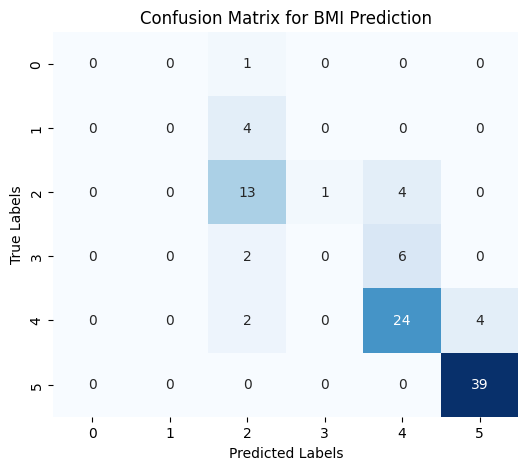

Accuracy: 0.76
F1 Score: 0.71


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model with L1 regularization (LASSO)
LASSO_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=200)

# Train the model
LASSO_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = LASSO_model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=LASSO_model.classes_, yticklabels=LASSO_model.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BMI Prediction')
plt.show()

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')


#Random Forest

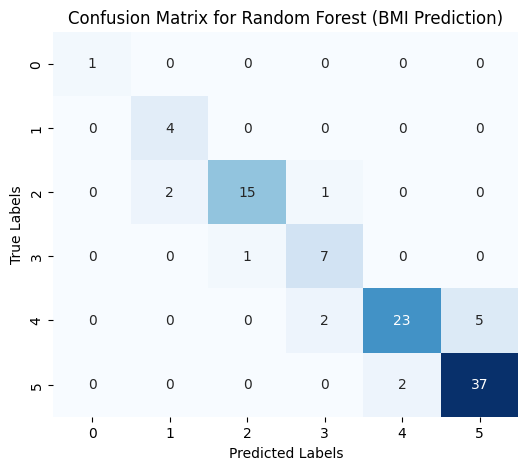

Accuracy: 0.87
F1 Score: 0.87


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest (BMI Prediction)')
plt.show()

# Calculate accuracy and print it
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")


The Random Forest model achieved an accuracy of 87%, meaning it correctly predicted the BMI category for 87% of the test data. The F1 score of 0.87 shows a good balance between precision and recall across all BMI categories.

From the confusion matrix:

Most predictions are correct (diagonal values), especially for categories like 4 (23 correct) and 5 (37 correct).
Some misclassifications occurred, particularly between neighboring BMI categories ( 4 misclassified as 5 or 2 misclassified as 3), which is expected due to overlapping feature values.

F1 Score (Weighted): 0.87
ROC-AUC Score (Weighted): 0.98


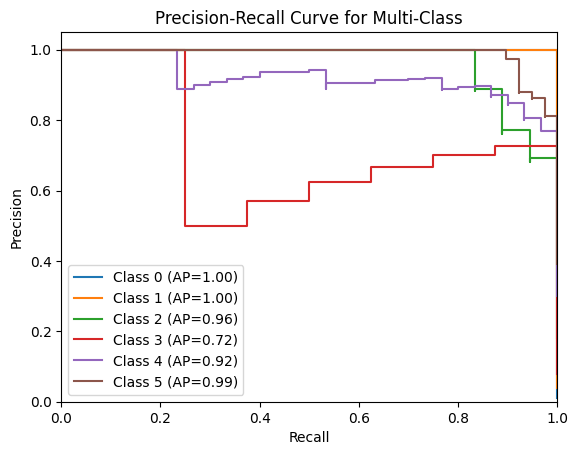

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming the classes are integers: 0, 1, 2, 3, 4, 5
classes = rf_model.classes_
y_test_binarized = label_binarize(y_test, classes=classes)  # Binarize the true labels
y_prob = rf_model.predict_proba(X_test)  # Predicted probabilities for each class

# Calculate F1 Score (weighted for multi-class)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.2f}")

# Calculate ROC-AUC (one-vs-rest for multi-class)
roc_auc = roc_auc_score(y_test_binarized, y_prob, average='weighted', multi_class='ovr')
print(f"ROC-AUC Score (Weighted): {roc_auc:.2f}")

# Plot Precision-Recall Curve (multi-class)
precision = dict()
recall = dict()
average_precision = dict()

plt.figure()
for i, class_label in enumerate(classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_prob[:, i])
    plt.step(recall[i], precision[i], where='post', label=f'Class {class_label} (AP={average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Multi-Class')
plt.legend(loc='lower left')
plt.show()


Class 0 and Class 1: Perfect AP = 1.00, meaning the model predicts these classes with very high precision and recall.

Class 5: AP = 0.99, also performing very well.

Class 3: AP = 0.72, which is lower compared to other classes, suggesting the model struggles more with this class.

A steep curve near the top right (high precision and recall) is ideal. Classes like 0, 1, and 5 perform very well.
Flat or lower curves (e.g., Class 3) indicate the model has a harder time balancing precision and recall.

# K fold cross Validation

In [ ]:
# Assuming X and y are already defined
# Define the number of folds for k-fold cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # Setting random_state for reproducibility

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Use `.iloc` for DataFrame indexing
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the model (using RandomForestClassifier as an example)
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate and store the accuracy for the current fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the accuracy for each fold
for fold, accuracy in enumerate(accuracy_scores):
    print(f"Fold {fold+1}: Accuracy = {accuracy:.2f}")

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)
print(f"\nAverage Accuracy across all folds: {average_accuracy:.2f}")


Fold 1: Accuracy = 0.88
Fold 2: Accuracy = 0.88
Fold 3: Accuracy = 0.89
Fold 4: Accuracy = 0.84
Fold 5: Accuracy = 0.88

Average Accuracy across all folds: 0.87


The k-fold cross-validation results show that the Random Forest model consistently performed well across all 5 folds, with accuracies ranging from 84% to 89%. The average accuracy across all folds is 87%, indicating the model's reliability and generalization ability on unseen data. The small variation between folds suggests the model is stable and not overfitting.

# Support Vector Machines (SVM)

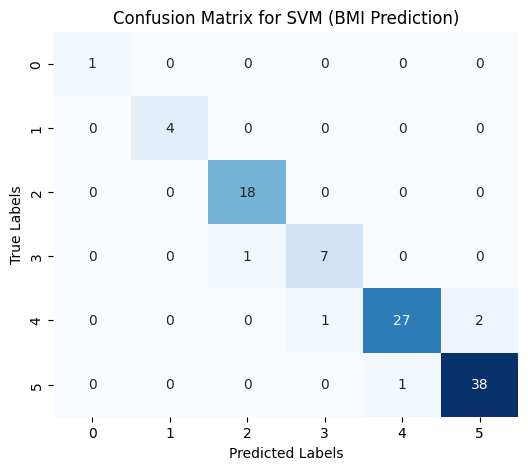

Accuracy: 0.95
F1 Score (Weighted): 0.95
ROC-AUC Score (Weighted): 1.00


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # You can change the kernel

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM (BMI Prediction)')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate weighted F1 score (for multi-class classification)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.2f}")

# ROC-AUC (for multi-class classification)
# Binarize y_test for multi-class ROC-AUC
classes = svm_model.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
y_prob = svm_model.predict_proba(X_test)  # Predicted probabilities

roc_auc = roc_auc_score(y_test_binarized, y_prob, average='weighted', multi_class='ovr')
print(f"ROC-AUC Score (Weighted): {roc_auc:.2f}")


The Support Vector Machine (SVM) model performed exceptionally well on the BMI prediction task:

Accuracy: The model correctly classified 95% of the test data.
F1 Score (Weighted): A strong score of 0.95, indicating excellent balance between precision and recall across all BMI categories.
ROC-AUC Score (Weighted): A perfect score of 1.00, meaning the model can distinguish between BMI categories with high precision when using probabilities.
From the confusion matrix:

Most predictions are correct (diagonal values), especially for categories like 2 (18 correct), 4 (27 correct), and 5 (38 correct).
There are a few misclassifications, primarily between neighboring categories like 4 misclassified as 5.
